<a href="https://colab.research.google.com/github/adityaverma121/churn-lloyd-bank-project/blob/main/churn_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

file_path="/content/Customer_Churn_Data_Large.xlsx"

In [ ]:
df_demographics = pd.read_excel(file_path, sheet_name='Customer_Demographics')
df_transactions = pd.read_excel(file_path, sheet_name='Transaction_History')
df_service      = pd.read_excel(file_path, sheet_name='Customer_Service')
df_online       = pd.read_excel(file_path, sheet_name='Online_Activity')
df_churn        = pd.read_excel(file_path, sheet_name='Churn_Status')

print("Demographics:", df_demographics.shape)
print("Transactions:", df_transactions.shape)
print("Service     :", df_service.shape)
print("Online      :", df_online.shape)
print("Churn       :", df_churn.shape)

Demographics: (1000, 5)
Transactions: (5054, 5)
Service     : (1002, 5)
Online      : (1000, 4)
Churn       : (1000, 2)


In [ ]:
df_churn.head()

,CustomerID,ChurnStatus
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CustomerID   1000 non-null   int64
 1   ChurnStatus  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [ ]:
print("=== Demographics ===")
df_demographics.info()
print()

print("=== Transactions ===")
df_transactions.info()
print()

print("=== Service ===")
df_service.info()
print()

print("=== Online Activity ===")
df_online.info()
print()

print("=== Churn ===")
df_churn.info()


=== Demographics ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1000 non-null   int64 
 1   Age            1000 non-null   int64 
 2   Gender         1000 non-null   object
 3   MaritalStatus  1000 non-null   object
 4   IncomeLevel    1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB

=== Transactions ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       5054 non-null   int64         
 1   TransactionID    5054 non-null   int64         
 2   TransactionDate  5054 non-null   datetime64[ns]
 3   AmountSpent      5054 non-null   float64       
 4   ProductCategory  5054 non-null   object        
dtypes: datetime64[ns](

In [ ]:
print("Demographics unique CustomerID:", df_demographics['CustomerID'].nunique())
print("Transactions unique CustomerID:", df_transactions['CustomerID'].nunique())
print("Service unique CustomerID     :", df_service['CustomerID'].nunique())
print("Online unique CustomerID      :", df_online['CustomerID'].nunique())
print("Churn unique CustomerID       :", df_churn['CustomerID'].nunique())


Demographics unique CustomerID: 1000
Transactions unique CustomerID: 1000
Service unique CustomerID     : 668
Online unique CustomerID      : 1000
Churn unique CustomerID       : 1000


ChurnStatus
0    796
1    204
Name: count, dtype: int64

Percentage:
ChurnStatus
0    79.6
1    20.4
Name: proportion, dtype: float64


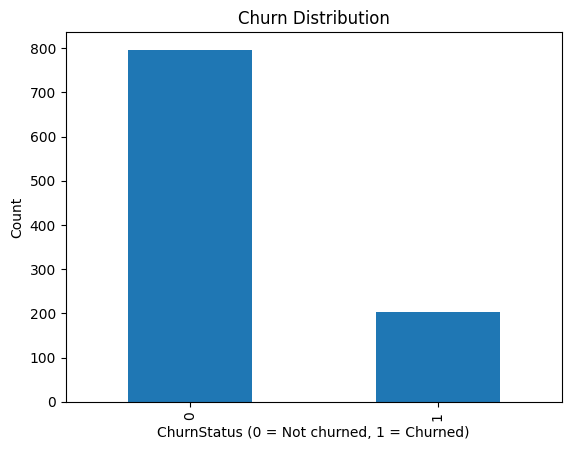

In [ ]:
import matplotlib.pyplot as plt
print(df_churn['ChurnStatus'].value_counts())
print("\nPercentage:")
print(df_churn['ChurnStatus'].value_counts(normalize=True) * 100)
df_churn['ChurnStatus'].value_counts().plot(kind='bar')
plt.xlabel('ChurnStatus (0 = Not churned, 1 = Churned)')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

In [ ]:
df_demo_churn = df_demographics.merge(df_churn, on='CustomerID', how='inner')
df_demo_churn.head()


,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus
0,1,62,M,Single,Low,0
1,2,65,M,Married,Low,1
2,3,18,M,Single,Low,0
3,4,21,M,Widowed,Low,0
4,5,21,M,Divorced,Medium,0


In [ ]:
df_demo_churn.shape


(1000, 6)

In [ ]:
df_demo_churn['Age'].describe()


,Age
count,1000.000000
mean,43.267000
std,15.242311
min,18.000000
25%,30.000000
50%,43.000000
75%,56.000000
max,69.000000


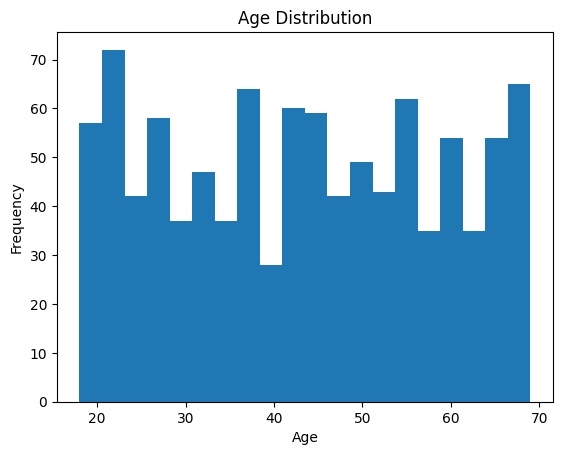

In [ ]:
plt.hist(df_demo_churn['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


In [ ]:
df_demo_churn.groupby('ChurnStatus')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
ChurnStatus,,,,,,,,
0,796.0,43.040201,15.263584,18.0,30.0,43.0,56.0,69.0
1,204.0,44.151961,15.163849,18.0,30.0,44.0,57.0,69.0


In [ ]:
print(df_demo_churn['Gender'].value_counts())
print()

print(df_demo_churn.groupby('Gender')['ChurnStatus'].mean())


Gender
F    513
M    487
Name: count, dtype: int64

Gender
F    0.196881
M    0.211499
Name: ChurnStatus, dtype: float64


In [ ]:
print(df_demo_churn['MaritalStatus'].value_counts())
print()

print(df_demo_churn.groupby('MaritalStatus')['ChurnStatus'].mean())


MaritalStatus
Widowed     276
Married     261
Divorced    248
Single      215
Name: count, dtype: int64

MaritalStatus
Divorced    0.185484
Married     0.229885
Single      0.204651
Widowed     0.195652
Name: ChurnStatus, dtype: float64


In [ ]:
print(df_demo_churn['IncomeLevel'].value_counts())
print()

print(df_demo_churn.groupby('IncomeLevel')['ChurnStatus'].mean())


IncomeLevel
High      349
Medium    326
Low       325
Name: count, dtype: int64

IncomeLevel
High      0.191977
Low       0.221538
Medium    0.199387
Name: ChurnStatus, dtype: float64


In [ ]:
df_transactions.head()


,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory
0,1,7194,2022-03-27,416.50,Electronics
1,2,7250,2022-08-08,54.96,Clothing
2,2,9660,2022-07-25,197.50,Electronics
3,2,2998,2022-01-25,101.31,Furniture
4,2,1228,2022-07-24,397.37,Clothing


In [ ]:
df_transactions.describe(include='all')


,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory
count,5054.000000,5054.000000,5054,5054.000000,5054
unique,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,Books
freq,NaN,NaN,NaN,NaN,1041
mean,501.424218,5510.538979,2022-07-01 19:25:37.158686208,250.707351,NaN
min,1.000000,1000.000000,2022-01-01 00:00:00,5.180000,NaN
25%,251.000000,3242.000000,2022-04-03 00:00:00,127.105000,NaN
50%,506.000000,5530.000000,2022-07-01 00:00:00,250.525000,NaN
75%,749.000000,7680.750000,2022-09-29 00:00:00,373.412500,NaN
max,1000.000000,9997.000000,2022-12-31 00:00:00,499.860000,NaN


In [ ]:
txn_agg = df_transactions.groupby('CustomerID').agg(
    TotalAmountSpent = ('AmountSpent', 'sum'),
    NumTransactions  = ('TransactionID', 'count'),
    AvgTransaction   = ('AmountSpent', 'mean'),
    LastTransaction  = ('TransactionDate', 'max'),
    FirstTransaction = ('TransactionDate', 'min')
).reset_index()

txn_agg.head()


,CustomerID,TotalAmountSpent,NumTransactions,AvgTransaction,LastTransaction,FirstTransaction
0,1,416.50,1,416.50000,2022-03-27,2022-03-27
1,2,1547.42,7,221.06000,2022-11-19,2022-01-09
2,3,1702.98,6,283.83000,2022-10-08,2022-02-11
3,4,917.29,5,183.45800,2022-12-27,2022-05-22
4,5,2001.49,8,250.18625,2022-12-21,2022-02-21


In [ ]:
txn_agg.shape


(1000, 6)

In [ ]:
txn_agg[['TotalAmountSpent', 'NumTransactions', 'AvgTransaction']].describe()


,TotalAmountSpent,NumTransactions,AvgTransaction
count,1000.000000,1000.000000,1000.000000
mean,1267.074950,5.054000,248.806511
std,738.590013,2.603433,79.372766
min,9.800000,1.000000,9.800000
25%,626.685000,3.000000,203.734167
50%,1232.880000,5.000000,250.121458
75%,1791.902500,7.000000,295.023854
max,3386.040000,9.000000,496.990000


In [ ]:
df_model_step1 = df_demo_churn.merge(txn_agg, on='CustomerID', how='left')
df_model_step1.head()


,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus,TotalAmountSpent,NumTransactions,AvgTransaction,LastTransaction,FirstTransaction
0,1,62,M,Single,Low,0,416.50,1,416.50000,2022-03-27,2022-03-27
1,2,65,M,Married,Low,1,1547.42,7,221.06000,2022-11-19,2022-01-09
2,3,18,M,Single,Low,0,1702.98,6,283.83000,2022-10-08,2022-02-11
3,4,21,M,Widowed,Low,0,917.29,5,183.45800,2022-12-27,2022-05-22
4,5,21,M,Divorced,Medium,0,2001.49,8,250.18625,2022-12-21,2022-02-21


In [ ]:
df_model_step1.shape

(1000, 11)

In [ ]:
df_model_step1[['TotalAmountSpent', 'NumTransactions', 'AvgTransaction']].describe()


,TotalAmountSpent,NumTransactions,AvgTransaction
count,1000.000000,1000.000000,1000.000000
mean,1267.074950,5.054000,248.806511
std,738.590013,2.603433,79.372766
min,9.800000,1.000000,9.800000
25%,626.685000,3.000000,203.734167
50%,1232.880000,5.000000,250.121458
75%,1791.902500,7.000000,295.023854
max,3386.040000,9.000000,496.990000


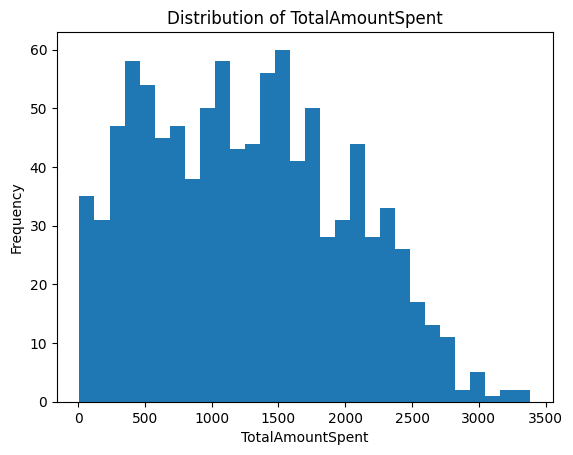

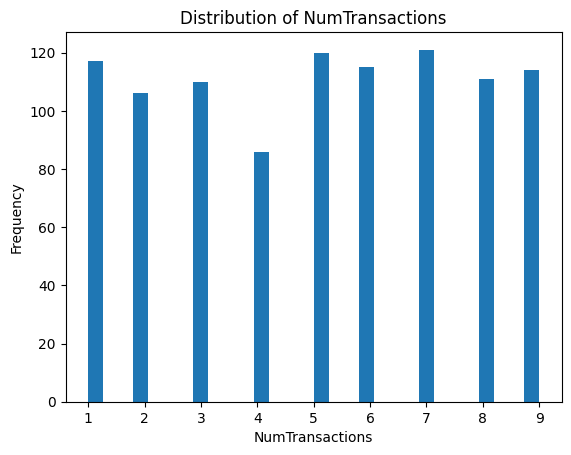

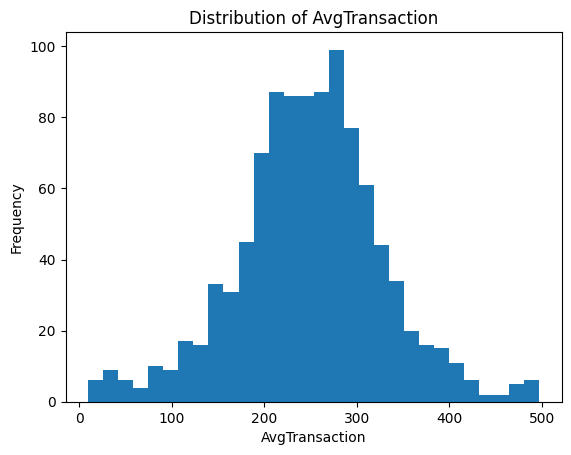

In [ ]:
import matplotlib.pyplot as plt

features = ['TotalAmountSpent', 'NumTransactions', 'AvgTransaction']

for col in features:
    plt.hist(df_model_step1[col], bins=30)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()


In [ ]:
df_model_step1.groupby('ChurnStatus')[['TotalAmountSpent', 'NumTransactions', 'AvgTransaction']].mean()


,TotalAmountSpent,NumTransactions,AvgTransaction
ChurnStatus,,,
0,1266.580038,5.065327,247.006812
1,1269.006078,5.009804,255.828867


In [ ]:
df_model_step1.groupby('ChurnStatus')[['TotalAmountSpent', 'NumTransactions', 'AvgTransaction']].median()


,TotalAmountSpent,NumTransactions,AvgTransaction
ChurnStatus,,,
0,1255.36,5.0,248.280000
1,1135.37,5.0,252.709643


In [ ]:
df_service['InteractionType'].value_counts()
df_service['ResolutionStatus'].value_counts()


,count
ResolutionStatus,
Resolved,523
Unresolved,479


In [ ]:
service_agg = df_service.groupby('CustomerID').agg(
    NumInteractions   = ('InteractionID', 'count'),
    LastInteraction   = ('InteractionDate', 'max'),
    FirstInteraction  = ('InteractionDate', 'min')
).reset_index()


In [ ]:
# Complaint count per customer
complaints = df_service[df_service['InteractionType'] == 'Complaint'] \
    .groupby('CustomerID').size().rename('NumComplaints')

# Unresolved interactions per customer
unresolved = df_service[df_service['ResolutionStatus'] == 'Unresolved'] \
    .groupby('CustomerID').size().rename('NumUnresolved')

# Merge into service_agg
service_agg = service_agg.merge(complaints, on='CustomerID', how='left')
service_agg = service_agg.merge(unresolved, on='CustomerID', how='left')

# Replace NaN with 0 for counts
service_agg['NumComplaints'] = service_agg['NumComplaints'].fillna(0).astype(int)
service_agg['NumUnresolved'] = service_agg['NumUnresolved'].fillna(0).astype(int)

service_agg.head()
service_agg.shape


(668, 6)

In [ ]:
df_model_step2 = df_model_step1.merge(service_agg, on='CustomerID', how='left')
df_model_step2.shape
df_model_step2.head()


,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus,TotalAmountSpent,NumTransactions,AvgTransaction,LastTransaction,FirstTransaction,NumInteractions,LastInteraction,FirstInteraction,NumComplaints,NumUnresolved
0,1,62,M,Single,Low,0,416.50,1,416.50000,2022-03-27,2022-03-27,1.0,2022-03-31,2022-03-31,0.0,0.0
1,2,65,M,Married,Low,1,1547.42,7,221.06000,2022-11-19,2022-01-09,1.0,2022-03-17,2022-03-17,0.0,0.0
2,3,18,M,Single,Low,0,1702.98,6,283.83000,2022-10-08,2022-02-11,1.0,2022-08-24,2022-08-24,0.0,0.0
3,4,21,M,Widowed,Low,0,917.29,5,183.45800,2022-12-27,2022-05-22,2.0,2022-11-18,2022-07-03,0.0,1.0
4,5,21,M,Divorced,Medium,0,2001.49,8,250.18625,2022-12-21,2022-02-21,NaN,NaT,NaT,NaN,NaN


In [ ]:
df_model_step2['NumInteractions'].isna().sum()


np.int64(332)

In [ ]:
df_model_step2['NumInteractions'] = df_model_step2['NumInteractions'].fillna(0)
df_model_step2['NumComplaints']   = df_model_step2['NumComplaints'].fillna(0)
df_model_step2['NumUnresolved']   = df_model_step2['NumUnresolved'].fillna(0)


In [ ]:
df_model_step2[['NumInteractions', 'NumComplaints', 'NumUnresolved']].describe()


,NumInteractions,NumComplaints,NumUnresolved
count,1000.000000,1000.000000,1000.000000
mean,1.002000,0.335000,0.479000
std,0.816494,0.546877,0.621245
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000


In [ ]:
df_model_step2.groupby('ChurnStatus')[['NumInteractions', 'NumComplaints', 'NumUnresolved']].mean()


,NumInteractions,NumComplaints,NumUnresolved
ChurnStatus,,,
0,1.000000,0.330402,0.477387
1,1.009804,0.352941,0.485294


In [ ]:
df_model_step2['HasComplaint'] = (df_model_step2['NumComplaints'] > 0).astype(int)
df_model_step2.groupby('HasComplaint')['ChurnStatus'].mean()


,ChurnStatus
HasComplaint,
0,0.199147
1,0.215488


In [ ]:
df_online.head()
df_online['ServiceUsage'].value_counts()
df_online['LoginFrequency'].describe()
df_online['LastLoginDate'].min(), df_online['LastLoginDate'].max()


(Timestamp('2023-01-01 00:00:00'), Timestamp('2023-12-31 00:00:00'))

In [ ]:
df_model_step3 = df_model_step2.merge(df_online, on='CustomerID', how='left')
df_model_step3.shape
df_model_step3.head()


,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,ChurnStatus,TotalAmountSpent,NumTransactions,AvgTransaction,LastTransaction,FirstTransaction,NumInteractions,LastInteraction,FirstInteraction,NumComplaints,NumUnresolved,HasComplaint,LastLoginDate,LoginFrequency,ServiceUsage
0,1,62,M,Single,Low,0,416.50,1,416.50000,2022-03-27,2022-03-27,1.0,2022-03-31,2022-03-31,0.0,0.0,0,2023-10-21,34,Mobile App
1,2,65,M,Married,Low,1,1547.42,7,221.06000,2022-11-19,2022-01-09,1.0,2022-03-17,2022-03-17,0.0,0.0,0,2023-12-05,5,Website
2,3,18,M,Single,Low,0,1702.98,6,283.83000,2022-10-08,2022-02-11,1.0,2022-08-24,2022-08-24,0.0,0.0,0,2023-11-15,3,Website
3,4,21,M,Widowed,Low,0,917.29,5,183.45800,2022-12-27,2022-05-22,2.0,2022-11-18,2022-07-03,0.0,1.0,0,2023-08-25,2,Website
4,5,21,M,Divorced,Medium,0,2001.49,8,250.18625,2022-12-21,2022-02-21,0.0,NaT,NaT,0.0,0.0,0,2023-10-27,41,Website


In [ ]:
df_model_step2[['NumInteractions', 'NumComplaints', 'NumUnresolved']].describe()
df_model_step2.groupby('ChurnStatus')[['NumInteractions', 'NumComplaints', 'NumUnresolved']].mean()
df_model_step2.groupby('HasComplaint')['ChurnStatus'].mean()


,ChurnStatus
HasComplaint,
0,0.199147
1,0.215488


In [ ]:
df_model_step3.isna().sum()


,0
CustomerID,0
Age,0
Gender,0
MaritalStatus,0
IncomeLevel,0
ChurnStatus,0
TotalAmountSpent,0
NumTransactions,0
AvgTransaction,0
LastTransaction,0


In [ ]:
df_model_step3['NumInteractions'] = df_model_step3['NumInteractions'].fillna(0)
df_model_step3['NumComplaints']   = df_model_step3['NumComplaints'].fillna(0)
df_model_step3['NumUnresolved']   = df_model_step3['NumUnresolved'].fillna(0)

# Convert to int
df_model_step3['NumInteractions'] = df_model_step3['NumInteractions'].astype(int)
df_model_step3['NumComplaints']   = df_model_step3['NumComplaints'].astype(int)
df_model_step3['NumUnresolved']   = df_model_step3['NumUnresolved'].astype(int)


In [ ]:

df_model_step3['ServiceUsage'].value_counts()


,count
ServiceUsage,
Online Banking,349
Mobile App,342
Website,309


In [ ]:
df_model_step3['LoginFrequency'].describe()

,LoginFrequency
count,1000.000000
mean,25.912000
std,14.055953
min,1.000000
25%,13.750000
50%,27.000000
75%,38.000000
max,49.000000


In [ ]:
df_model_step3.groupby('ServiceUsage')['ChurnStatus'].mean()

,ChurnStatus
ServiceUsage,
Mobile App,0.230994
Online Banking,0.200573
Website,0.177994


In [ ]:
df_model_step3.groupby('ChurnStatus')['LoginFrequency'].describe()

,count,mean,std,min,25%,50%,75%,max
ChurnStatus,,,,,,,,
0,796.0,26.492462,13.846642,1.0,14.0,28.0,38.0,49.0
1,204.0,23.647059,14.660793,1.0,10.5,24.0,37.0,49.0


In [ ]:
reference_date = df_model_step3['LastLoginDate'].max()
reference_date

Timestamp('2023-12-31 00:00:00')

In [ ]:
df_model_step3['DaysSinceLastLogin'] = (reference_date - df_model_step3['LastLoginDate']).dt.days
df_model_step3['DaysSinceLastTransaction'] = (reference_date - df_model_step3['LastTransaction']).dt.days
df_model_step3['DaysSinceFirstTransaction'] = (reference_date - df_model_step3['FirstTransaction']).dt.days

In [ ]:
df_model_step3['DaysSinceLastInteraction'] = (reference_date - df_model_step3['LastInteraction']).dt.days

In [ ]:
df_model_step3[['DaysSinceLastLogin',
                'DaysSinceLastTransaction',
                'DaysSinceFirstTransaction',
                'DaysSinceLastInteraction']].head()

,DaysSinceLastLogin,DaysSinceLastTransaction,DaysSinceFirstTransaction,DaysSinceLastInteraction
0,71,644,644,640.0
1,26,407,721,654.0
2,46,449,688,494.0
3,128,369,588,408.0
4,65,375,678,NaN


In [ ]:
max_recency_interaction = df_model_step3['DaysSinceLastInteraction'].max(skipna=True)
max_recency_interaction

725.0

In [ ]:
df_model_step3['DaysSinceLastInteraction'] = df_model_step3['DaysSinceLastInteraction'].fillna(max_recency_interaction)


In [ ]:
df_model_step3.isna().sum()


,0
CustomerID,0
Age,0
Gender,0
MaritalStatus,0
IncomeLevel,0
ChurnStatus,0
TotalAmountSpent,0
NumTransactions,0
AvgTransaction,0
LastTransaction,0


In [ ]:
df_model = df_model_step3.drop(
    columns=[
        'LastTransaction',
        'FirstTransaction',
        'LastInteraction',
        'FirstInteraction',
        'LastLoginDate'
    ]
)

df_model.head()
df_model.shape


(1000, 19)

In [ ]:
target = 'ChurnStatus'
id_col = 'CustomerID'

X = df_model.drop(columns=[target])
y = df_model[target]

X.shape, y.shape


((1000, 18), (1000,))

In [ ]:
numeric_cols = [
    'Age',
    'TotalAmountSpent',
    'NumTransactions',
    'AvgTransaction',
    'NumInteractions',
    'NumComplaints',
    'NumUnresolved',
    'HasComplaint',
    'LoginFrequency',
    'DaysSinceLastLogin',
    'DaysSinceLastTransaction',
    'DaysSinceFirstTransaction',
    'DaysSinceLastInteraction'
]

categorical_cols = [
    'Gender',
    'MaritalStatus',
    'IncomeLevel',
    'ServiceUsage'
]


In [ ]:
X[numeric_cols].head()
X[categorical_cols].head()


,Gender,MaritalStatus,IncomeLevel,ServiceUsage
0,M,Single,Low,Mobile App
1,M,Married,Low,Website
2,M,Single,Low,Website
3,M,Widowed,Low,Website
4,M,Divorced,Medium,Website


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

X_numeric_scaled_array = scaler.fit_transform(X[numeric_cols])

X_numeric_scaled = pd.DataFrame(
    X_numeric_scaled_array,
    columns=numeric_cols,
    index=X.index
)

X_numeric_scaled.head()


,Age,TotalAmountSpent,NumTransactions,AvgTransaction,NumInteractions,NumComplaints,NumUnresolved,HasComplaint,LoginFrequency,DaysSinceLastLogin,DaysSinceLastTransaction,DaysSinceFirstTransaction,DaysSinceLastInteraction
0,1.229628,-1.152196,-1.557954,2.113790,-0.002451,-0.612876,-0.771419,-0.649981,0.575702,-1.021557,2.553962,-0.092667,0.425727
1,1.426547,0.379758,0.747849,-0.349747,-0.002451,-0.612876,-0.771419,-0.649981,-1.488513,-1.450763,-0.458190,0.904168,0.536402
2,-1.658518,0.590481,0.363548,0.441474,-0.002451,-0.612876,-0.771419,-0.649981,-1.630872,-1.260005,0.075609,0.476953,-0.728455
3,-1.461599,-0.473822,-0.020752,-0.823723,1.222911,-0.612876,0.839059,-0.649981,-1.702052,-0.477897,-0.941151,-0.817637,-1.408315
4,-1.461599,0.994845,1.132149,0.017392,-1.227812,-0.612876,-0.771419,-0.649981,1.073961,-1.078785,-0.864894,0.347494,1.097682


In [ ]:
X_categorical_encoded = pd.get_dummies(X[categorical_cols], drop_first=True)

X_categorical_encoded.head()


,Gender_M,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,IncomeLevel_Low,IncomeLevel_Medium,ServiceUsage_Online Banking,ServiceUsage_Website
0,True,False,True,False,True,False,False,False
1,True,True,False,False,True,False,False,True
2,True,False,True,False,True,False,False,True
3,True,False,False,True,True,False,False,True
4,True,False,False,False,False,True,False,True


In [ ]:
X_final = pd.concat(
    [X_numeric_scaled, X_categorical_encoded],
    axis=1
)

X_final.shape
X_final.head()


,Age,TotalAmountSpent,NumTransactions,AvgTransaction,NumInteractions,NumComplaints,NumUnresolved,HasComplaint,LoginFrequency,DaysSinceLastLogin,...,DaysSinceFirstTransaction,DaysSinceLastInteraction,Gender_M,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,IncomeLevel_Low,IncomeLevel_Medium,ServiceUsage_Online Banking,ServiceUsage_Website
0,1.229628,-1.152196,-1.557954,2.113790,-0.002451,-0.612876,-0.771419,-0.649981,0.575702,-1.021557,...,-0.092667,0.425727,True,False,True,False,True,False,False,False
1,1.426547,0.379758,0.747849,-0.349747,-0.002451,-0.612876,-0.771419,-0.649981,-1.488513,-1.450763,...,0.904168,0.536402,True,True,False,False,True,False,False,True
2,-1.658518,0.590481,0.363548,0.441474,-0.002451,-0.612876,-0.771419,-0.649981,-1.630872,-1.260005,...,0.476953,-0.728455,True,False,True,False,True,False,False,True
3,-1.461599,-0.473822,-0.020752,-0.823723,1.222911,-0.612876,0.839059,-0.649981,-1.702052,-0.477897,...,-0.817637,-1.408315,True,False,False,True,True,False,False,True
4,-1.461599,0.994845,1.132149,0.017392,-1.227812,-0.612876,-0.771419,-0.649981,1.073961,-1.078785,...,0.347494,1.097682,True,False,False,False,False,True,False,True


In [ ]:
df_final = X_final.copy()
df_final['ChurnStatus'] = y.values
df_final['CustomerID'] = df_model[id_col].values  # optional, usually put at front

# Move CustomerID to first column
cols = ['CustomerID'] + [c for c in df_final.columns if c != 'CustomerID']
df_final = df_final[cols]

df_final.head()


,CustomerID,Age,TotalAmountSpent,NumTransactions,AvgTransaction,NumInteractions,NumComplaints,NumUnresolved,HasComplaint,LoginFrequency,...,DaysSinceLastInteraction,Gender_M,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,IncomeLevel_Low,IncomeLevel_Medium,ServiceUsage_Online Banking,ServiceUsage_Website,ChurnStatus
0,1,1.229628,-1.152196,-1.557954,2.113790,-0.002451,-0.612876,-0.771419,-0.649981,0.575702,...,0.425727,True,False,True,False,True,False,False,False,0
1,2,1.426547,0.379758,0.747849,-0.349747,-0.002451,-0.612876,-0.771419,-0.649981,-1.488513,...,0.536402,True,True,False,False,True,False,False,True,1
2,3,-1.658518,0.590481,0.363548,0.441474,-0.002451,-0.612876,-0.771419,-0.649981,-1.630872,...,-0.728455,True,False,True,False,True,False,False,True,0
3,4,-1.461599,-0.473822,-0.020752,-0.823723,1.222911,-0.612876,0.839059,-0.649981,-1.702052,...,-1.408315,True,False,False,True,True,False,False,True,0
4,5,-1.461599,0.994845,1.132149,0.017392,-1.227812,-0.612876,-0.771419,-0.649981,1.073961,...,1.097682,True,False,False,False,False,True,False,True,0


In [ ]:
df_final.to_csv('customer_churn_model_data_cleaned.csv', index=False)


In [ ]:
df_final.head()

,CustomerID,Age,TotalAmountSpent,NumTransactions,AvgTransaction,NumInteractions,NumComplaints,NumUnresolved,HasComplaint,LoginFrequency,...,DaysSinceLastInteraction,Gender_M,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,IncomeLevel_Low,IncomeLevel_Medium,ServiceUsage_Online Banking,ServiceUsage_Website,ChurnStatus
0,1,1.229628,-1.152196,-1.557954,2.113790,-0.002451,-0.612876,-0.771419,-0.649981,0.575702,...,0.425727,True,False,True,False,True,False,False,False,0
1,2,1.426547,0.379758,0.747849,-0.349747,-0.002451,-0.612876,-0.771419,-0.649981,-1.488513,...,0.536402,True,True,False,False,True,False,False,True,1
2,3,-1.658518,0.590481,0.363548,0.441474,-0.002451,-0.612876,-0.771419,-0.649981,-1.630872,...,-0.728455,True,False,True,False,True,False,False,True,0
3,4,-1.461599,-0.473822,-0.020752,-0.823723,1.222911,-0.612876,0.839059,-0.649981,-1.702052,...,-1.408315,True,False,False,True,True,False,False,True,0
4,5,-1.461599,0.994845,1.132149,0.017392,-1.227812,-0.612876,-0.771419,-0.649981,1.073961,...,1.097682,True,False,False,False,False,True,False,True,0


In [ ]:
df_final.shape

(1000, 23)

In [ ]:
target = 'ChurnStatus'
id_col = 'CustomerID'

X = df_final.drop(columns=[target, id_col])
y = df_final[target]

X.shape, y.shape, y.mean()


((1000, 21), (1000,), np.float64(0.204))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape, y_train.mean(), y_test.mean()


((800, 21), (200, 21), np.float64(0.20375), np.float64(0.205))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

log_reg = LogisticRegression(
    penalty='l2',
    solver='liblinear',
    class_weight='balanced',
    max_iter=1000
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_auc = cross_val_score(
    log_reg,
    X_train,
    y_train,
    cv=cv,
    scoring='roc_auc'
)

cv_scores_f1 = cross_val_score(
    log_reg,
    X_train,
    y_train,
    cv=cv,
    scoring='f1'
)

cv_scores_auc.mean(), cv_scores_auc.std(), cv_scores_f1.mean(), cv_scores_f1.std()


(np.float64(0.5287639598805477),
 np.float64(0.05158069409859682),
 np.float64(0.3133153393602279),
 np.float64(0.026118775459121193))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

log_reg_base = LogisticRegression(
    solver='liblinear',
    class_weight='balanced',
    max_iter=1000
)

grid_search = GridSearchCV(
    estimator=log_reg_base,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

grid_search.best_params_, grid_search.best_score_


({'C': 10, 'penalty': 'l2'}, np.float64(0.5309302346173348))

In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score,
    f1_score
)

best_log_reg = grid_search.best_estimator_

best_log_reg


LogisticRegression(C=10, class_weight='balanced', max_iter=1000,
                   solver='liblinear')

In [ ]:
y_pred = best_log_reg.predict(X_test)
y_proba = best_log_reg.predict_proba(X_test)[:, 1]


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[75, 84],
       [23, 18]])

In [ ]:
print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.765     0.472     0.584       159
           1      0.176     0.439     0.252        41

    accuracy                          0.465       200
   macro avg      0.471     0.455     0.418       200
weighted avg      0.645     0.465     0.516       200



In [ ]:
roc_auc = roc_auc_score(y_test, y_proba)
roc_auc


np.float64(0.4462340849823593)

In [ ]:
precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

precision_1, recall_1, f1_1


(0.17647058823529413, 0.43902439024390244, 0.2517482517482518)

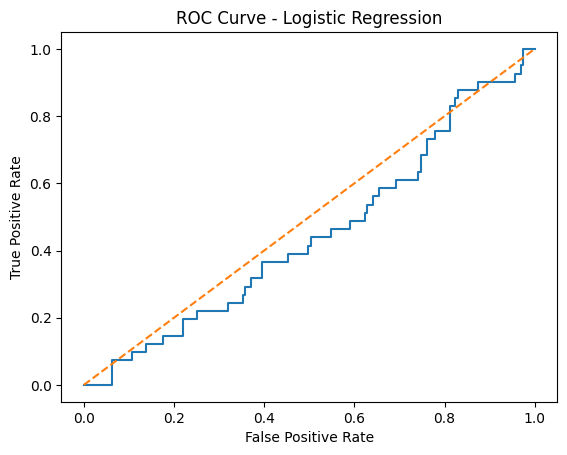

In [ ]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

feature_names = X.columns
coefs = best_log_reg.coef_[0]

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefs
}).sort_values(by='coefficient', ascending=False)

coef_df.head(10), coef_df.tail(10)


(                     feature  coefficient
 2            NumTransactions     0.496587
 17           IncomeLevel_Low     0.450082
 7               HasComplaint     0.411102
 3             AvgTransaction     0.360083
 14     MaritalStatus_Married     0.308701
 15      MaritalStatus_Single     0.302402
 12  DaysSinceLastInteraction     0.238585
 4            NumInteractions     0.229760
 13                  Gender_M     0.199382
 18        IncomeLevel_Medium     0.164321,
                         feature  coefficient
 9            DaysSinceLastLogin     0.027141
 16        MaritalStatus_Widowed     0.011049
 10     DaysSinceLastTransaction    -0.027685
 6                 NumUnresolved    -0.045006
 20         ServiceUsage_Website    -0.111367
 11    DaysSinceFirstTransaction    -0.124964
 19  ServiceUsage_Online Banking    -0.153613
 8                LoginFrequency    -0.159591
 5                 NumComplaints    -0.324223
 1              TotalAmountSpent    -0.513131)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_auc = cross_val_score(
    rf,
    X_train,
    y_train,
    cv=cv,
    scoring='roc_auc'
)

rf_f1 = cross_val_score(
    rf,
    X_train,
    y_train,
    cv=cv,
    scoring='f1'
)

rf_auc.mean(), rf_auc.std(), rf_f1.mean(), rf_f1.std()


(np.float64(0.5731337892955143),
 np.float64(0.03686842225179711),
 np.float64(0.0),
 np.float64(0.0))

In [ ]:
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits=3))

roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
roc_auc_rf


[[157   2]
 [ 41   0]]
              precision    recall  f1-score   support

           0      0.793     0.987     0.880       159
           1      0.000     0.000     0.000        41

    accuracy                          0.785       200
   macro avg      0.396     0.494     0.440       200
weighted avg      0.630     0.785     0.699       200



np.float64(0.5224727718975303)

In [ ]:
import matplotlib.pyplot as plt

churn_counts = df_churn['ChurnStatus'].value_counts().sort_index()

plt.figure()
churn_counts.plot(kind='bar')
plt.xticks([0, 1], ['Not churned (0)', 'Churned (1)'], rotation=0)
plt.ylabel('Number of customers')
plt.title('Churn distribution')
plt.tight_layout()
plt.savefig('fig_churn_distribution.png', dpi=300)
plt.close()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = best_log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - Logistic Regression')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('fig_roc_logreg.png', dpi=300)
plt.close()


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)  # y_pred from best_log_reg.predict(X_test)
cm


array([[75, 84],
       [23, 18]])

In [ ]:
import numpy as np

plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion matrix - Logistic Regression')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Pred 0', 'Pred 1'])
plt.yticks(tick_marks, ['Actual 0', 'Actual 1'])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha='center', va='center')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.savefig('fig_confusion_logreg.png', dpi=300)
plt.close()


In [ ]:
feature_names = X.columns
coefs = best_log_reg.coef_[0]

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefs
})

coef_df_sorted = coef_df.sort_values(by='coefficient', ascending=False)
coef_df_sorted.head(10)



,feature,coefficient
2,NumTransactions,0.496587
17,IncomeLevel_Low,0.450082
7,HasComplaint,0.411102
3,AvgTransaction,0.360083
14,MaritalStatus_Married,0.308701
15,MaritalStatus_Single,0.302402
12,DaysSinceLastInteraction,0.238585
4,NumInteractions,0.229760
13,Gender_M,0.199382
18,IncomeLevel_Medium,0.164321


In [ ]:
top_n = 10
top_pos = coef_df_sorted.head(top_n)

plt.figure(figsize=(8, 4))
plt.barh(top_pos['feature'], top_pos['coefficient'])
plt.xlabel('Coefficient')
plt.title('Top positive coefficients (higher churn risk)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('fig_top_coefficients.png', dpi=300)
plt.close()